In [37]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from datetime import datetime, timedelta

%matplotlib inline
plt.rcParams['font.size'] = 14

In [2]:
GEM = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [9]:
fn = '/home/bmoorema/Desktop/Desktop/Hakai_data/SuperCO2_FannyBay5mindata_submission.txt'
FannyBay = pd.read_csv(
    fn, delim_whitespace=True, header=0, names=['Yearday', 'Year', 'mtime', 'date', 'time', 'pCO2', 'T', 'S'],
    skiprows=6,
)
fn = '/home/bmoorema/Desktop/Desktop/Hakai_data/SuperCO2_quadra5mindata_submission.txt'
Quadra1 = pd.read_csv(
    fn, delim_whitespace=True, header=0, names=['Yearday', 'Year', 'mtime', 'date', 'time', 'pCO2', 'T', 'S'],
    skiprows=6,
)
fn = '/home/bmoorema/Desktop/Desktop/Hakai_data/QuadraBoL_5mindata_submission.txt'
Quadra2 = pd.read_csv(
    fn, delim_whitespace=True, header=0, names=['Yearday', 'Year', 'mtime', 'date', 'time', 'pCO2', 'T', 'S'],
    skiprows=6,
)

In [70]:
FBtime = [
    datetime.fromordinal(int(mtime)) + timedelta(days=mtime%1) -
    timedelta(days = 366) for mtime in FannyBay.mtime.values
]
Q1time = [
    datetime.fromordinal(int(mtime)) + timedelta(days=mtime%1) -
    timedelta(days = 366) for mtime in Quadra1.mtime.values
]
Q2time = [
    datetime.fromordinal(int(mtime)) + timedelta(days=mtime%1) -
    timedelta(days = 366) for mtime in Quadra2.mtime.values
]
Q1time.extend(Q2time)
pCO2 = np.concatenate((Quadra1.pCO2.values, Quadra2.pCO2.values))

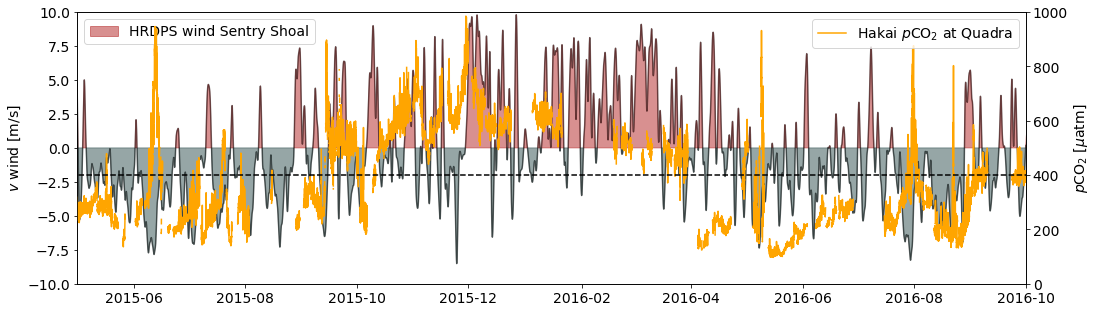

In [76]:
nyqst = 1 / 3600 / 2
highcut = 1 / 86400 / 2
v_wind_filt = signal.filtfilt(*signal.butter(2, highcut / nyqst), v_wind)
fig, ax = plt.subplots(1, 1, figsize=(17, 5))
ax.fill_between(GEM.time.values, v_wind_filt, where=v_wind_filt>0, alpha=0.5, color='firebrick', interpolate=True, label='HRDPS wind Sentry Shoal')
ax.fill_between(GEM.time.values, v_wind_filt, where=v_wind_filt<0, alpha=0.5, color='darkslategray', interpolate=True)
ax.plot(GEM.time.values, v_wind_filt, 'k-', alpha=0.5)
ax.set_xlim(['2015 May 1', '2016 Oct 1'])
ax.set_ylim([-10, 10])
ax.set_ylabel('$v$ wind [m/s]')
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(Q1time, pCO2, '-', color='orange', label='Hakai $p$CO$_2$ at Quadra')
#ax2.plot(Q2time, Quadra2.pCO2, '-', color='orange')
ax2.plot([Q1time[0], Q2time[-1]], [400, 400], 'k--')
ax2.set_xlim(['2015 May 1', '2016 Oct 1'])
ax2.set_ylim([0, 1000])
ax2.set_ylabel('$p$CO$_2$ [$\mu$atm]')
ax2.legend(loc=1)

fig.savefig('/home/bmoorema/Desktop/Hakai.pdf', dpi=300, bbox_inches='tight')

In [5]:
v_wind = GEM.v_wind.isel(gridY=183, gridX=107).values

In [46]:
Q1time[50000]

datetime.datetime(2015, 6, 27, 19, 31, 26, 400004)